In [1]:
import network_hw2 as nw
import numpy as np
from scipy.sparse import csr_matrix, identity, csc_matrix, diags
from scipy.sparse.linalg import spsolve, inv
from scipy.linalg import solve
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.io
import scipy as sp
from network_hw2 import *

Solving Page rank with linear system
time needed in order to solve the linear system = 0:00:01.346107
Solving Page rank with power iteration
time needed in order to finish power iteration = 0:00:00.008868
Solving Hits rank with linear system
time needed in order to solve the linear system = 0:00:00.016834
Solving Hits rank with power iteration
time needed in order to finish power iteration = 0:00:00.008745


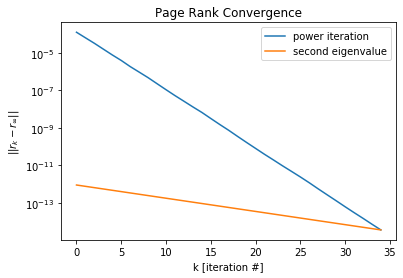

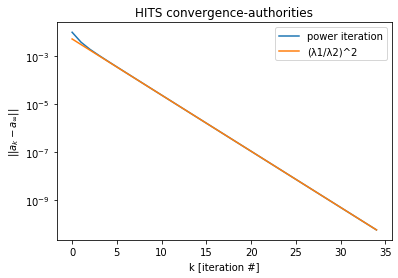

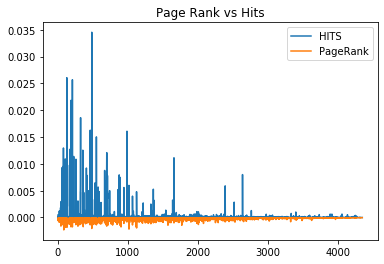

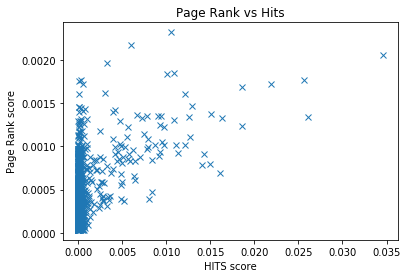

In [2]:
data = np.genfromtxt("p2p-Gnutella04.txt")

N = int(np.max(data)) + 1

#defining a sparse matrix, this is way faster than a np matrix
A = csr_matrix((np.ones(len(data)), (data[:, 1], data[:, 0])), shape = (N, N), dtype = np.int32)

A = nw.remove_dead_ends(A)
A = nw.clean_network(A)
N = A.shape[0]

print("Solving Page rank with linear system")

start = datetime.now()

p_ls_page = nw.page_rank_linear_system(A)

end = datetime.now()

print(f"time needed in order to solve the linear system = {end - start}")

print("Solving Page rank with power iteration")

start = datetime.now()

p_pi_page, err = nw.page_rank_power_iteration(A, p_linear=p_ls_page)

end = datetime.now()

print(f"time needed in order to finish power iteration = {end - start}")

#calculating the second highest eigenvalue
d = 1 / nw.get_degrees(A)
M = A * diags(d[:, 0])
v = nw.get_two_highest_eigenvalues(M)
v2 = v[1]

plt.title("Page Rank Convergence")
plt.semilogy(err)
ind = np.arange(35)
ref = (0.85*np.abs(v2))**ind
plt.semilogy(ind, ref/ref[-1]*err[-1])
plt.xlabel("k [iteration #]")
plt.ylabel(r"$||r_k - r_\infty||$")
plt.legend(["power iteration", "second eigenvalue"])

print("Solving Hits rank with linear system")

start = datetime.now()

p_ls_hits = nw.hits_linear_system(A)

end = datetime.now()

print(f"time needed in order to solve the linear system = {end - start}")

print("Solving Hits rank with power iteration")

start = datetime.now()

p_pi_hits, err = nw.hits_power_iteration(A, p_linear=p_ls_hits)

end = datetime.now()

print(f"time needed in order to finish power iteration = {end - start}")


#getting the two highest eigenvalues
v = nw.get_two_highest_eigenvalues(A*A.T)

plt.figure()
plt.title("HITS convergence-authorities")
plt.semilogy(err)
ind = np.arange(35)
ref = np.abs(v[1]/v[0])**ind
plt.semilogy(ind, (ref/ref[-1])*err[-1])
plt.xlabel("k [iteration #]")
plt.ylabel(r"$||a_k - a_\infty||$")
plt.legend(["power iteration", "(λ1/λ2)^2"])

plt.figure()
plt.title("Page Rank vs Hits")
plt.plot(p_ls_hits/np.sum(p_ls_hits))
plt.plot(-p_ls_page/np.sum(p_ls_page))
plt.legend(["HITS", "PageRank"])

plt.figure()
plt.title("Page Rank vs Hits")
plt.plot(p_ls_hits/np.sum(p_ls_hits), p_ls_page/np.sum(p_ls_page), marker = 'x', linestyle = "None")
plt.xlabel("HITS score")
plt.ylabel("Page Rank score")
plt.show()


In [3]:
'''
data = np.genfromtxt("p2p-Gnutella04.txt")

N = int(np.max(data)) + 1

#defining a sparse matrix, this is way faster than a np matrix
A = csr_matrix((np.ones(len(data)), (data[:, 1], data[:, 0])), shape = (N, N), dtype = np.int32)

'''

'\ndata = np.genfromtxt("p2p-Gnutella04.txt")\n\nN = int(np.max(data)) + 1\n\n#defining a sparse matrix, this is way faster than a np matrix\nA = csr_matrix((np.ones(len(data)), (data[:, 1], data[:, 0])), shape = (N, N), dtype = np.int32)\n\n'

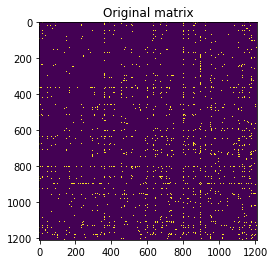

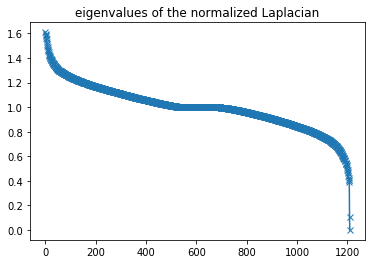

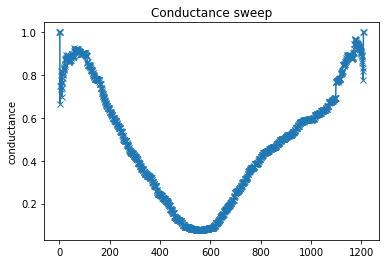

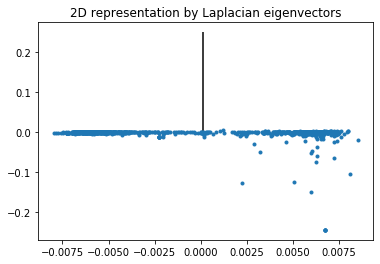

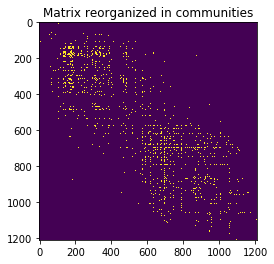

In [4]:


#loading the mat file
mat = scipy.io.loadmat("pol_blog.mat")

#converting the sparse matrix from csc to csr
A = mat["A"].tocsr()

N = A.shape[0]

#showing the matrix
plt.title("Original matrix")
plt.imshow(A.toarray())

#getting the laplacian
L = get_normalized_laplacian(A)

#calculating the eigenvectors and eigenvalues of the laplacian
eigs, vec = np.linalg.eigh(L.toarray())

plt.figure()
#plotting the eigenvalues
plt.plot(np.sort(eigs)[::-1], marker="x")
plt.title("eigenvalues of the normalized Laplacian")

v1, v2 = get_fiedler_vector(A)

#reordering the matrix according to fiedler vector
A1, ids = reorder_nodes(A, v1, True)
conductance = get_conductance(A1)

plt.figure()
plt.plot(conductance, marker="x")
plt.title("Conductance sweep")
plt.ylabel("conductance")

#finding out the community separation point
separator = np.argmin(conductance)

#plotting fiedler vector against the following eigenvector 
plt.figure()
plt.plot(v1, v2, marker = '.', linestyle="None")
plt.vlines(v1[ids][separator], 0, 0.25)
plt.title("2D representation by Laplacian eigenvectors")

#showing the communities
plt.figure()
plt.title("Matrix reorganized in communities")
plt.imshow(A1.toarray())

plt.show()

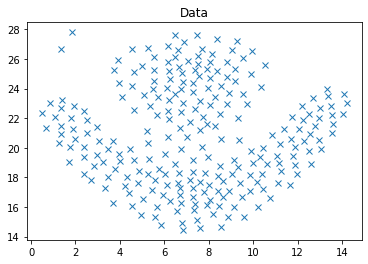

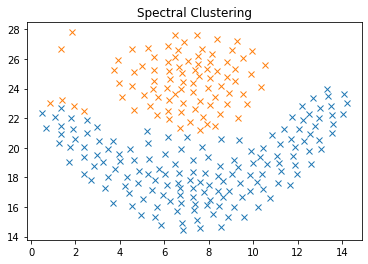

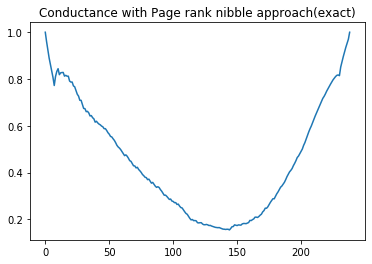

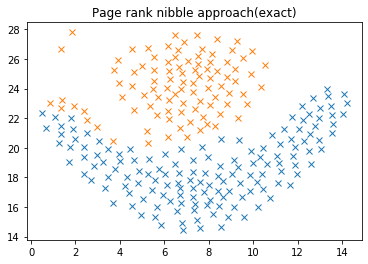

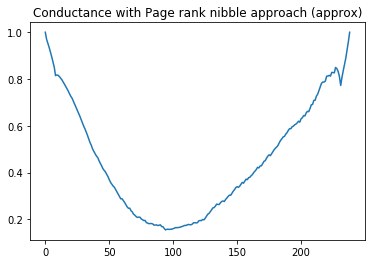

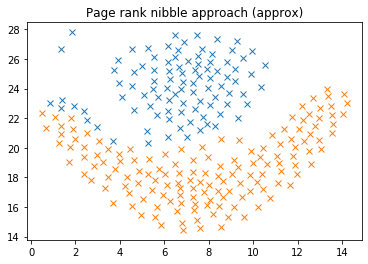

In [141]:
data = np.genfromtxt("D31.txt")

N = len(data)

data = (data[:, 0] + data[:, 1]*1j).reshape(N, 1)
plt.plot(data.real, data.imag, marker="x", linestyle="None")
plt.title("Data")

A = 1*(np.abs(data - data.T) <= 4)
A = A - np.diag(np.diag(A))
A = sparse.csr_matrix(A)

#spectral approach
v1, v2 = nw.get_fiedler_vector(A)

A1, ids = nw.reorder_nodes(A, v1)

conductance = nw.get_conductance(A1)

#getting the threshold
separator = np.argmin(conductance) + 1

#getting the two communities
C1 = data[ids[:separator]]
C2 = data[ids[separator:]]

plt.figure()
plt.title("Spectral Clustering")
plt.plot(C1.real, C1.imag, marker = "x", linestyle="None")
plt.plot(C2.real, C2.imag, marker = "x", linestyle="None")

#page nibble infinite precision

#setting the teleport vector
q = np.zeros((N,1))
q[0] = 1

#solving page rank with the proper teleport vector
r = nw.page_rank_linear_system(A, q=q)

#reordering A according to r
A1, ids = nw.reorder_nodes(A, r)
r_sort = r[ids]

#computing conductance
conductance = nw.get_conductance(A1)

#removing data relative to nodes that have value zero in Page rank starting from q
conductance = conductance[(r_sort[:-1] > 0).reshape(-1)]

plt.figure()
plt.plot(conductance)
plt.title("Conductance with Page rank nibble approach(exact)")


#getting the threshold
pos = np.argmin(conductance) + 1


#getting the two communities
C1 = data[ids[:pos]]
C2 = data[ids[pos:]]

plt.figure()
plt.plot(C1.real, C1.imag, marker = "x", linestyle="None")
plt.plot(C2.real, C2.imag, marker = "x", linestyle="None")
plt.title("Page rank nibble approach(exact)")

#page nibble 
u = nw.page_nibble_with_finite_precision(A, 1e-3)

A1, ids = nw.reorder_nodes(A, u, True)
u_sort = u[ids]

conductance = nw.get_conductance(A1)

conductance = conductance[(u_sort[:-1] > 0).reshape(-1)]

plt.figure()
plt.plot(conductance)
plt.title("Conductance with Page rank nibble approach (approx)")


pos = np.argmin(conductance) + 1
plt.figure()
C1 = data[ids[:pos]]
C2 = data[ids[pos:]]
plt.plot(C1.real, C1.imag, marker = "x", linestyle="None")
plt.plot(C2.real, C2.imag, marker = "x", linestyle="None")
plt.title("Page rank nibble approach (approx)")
plt.show()